<a href="https://colab.research.google.com/github/PhuongThaoNguyen04/HeartDiseaseDataset/blob/main/Heart_Disease_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [27]:
df= pd.read_csv('/content/heart.csv')

In [28]:
# Convert 'sex' column values to numerical
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Convert 'thal' column values to numerical
df['thal'] = df['thal'].map({'normal': 1, 'fixed defect': 2, 'revesible defect': 3})

# Convert 'exercise' column values to numerical
df['exercise'] = df['exercise'].map({'yes': 1, 'no': 0})

# Display the first few rows to verify changes
df[['sex', 'thal', 'exercise']].head()

,sex,thal,exercise
0,0,1.0,0.0
1,0,2.0,0.0
2,1,2.0,0.0
3,0,2.0,0.0
4,1,2.0,1.0


In [29]:
# Handle missing data by filling missing values with the median for each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() # Get numeric column names
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True) # Replace missing values with the median

<ipython-input-29-fcb28b0146c5>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





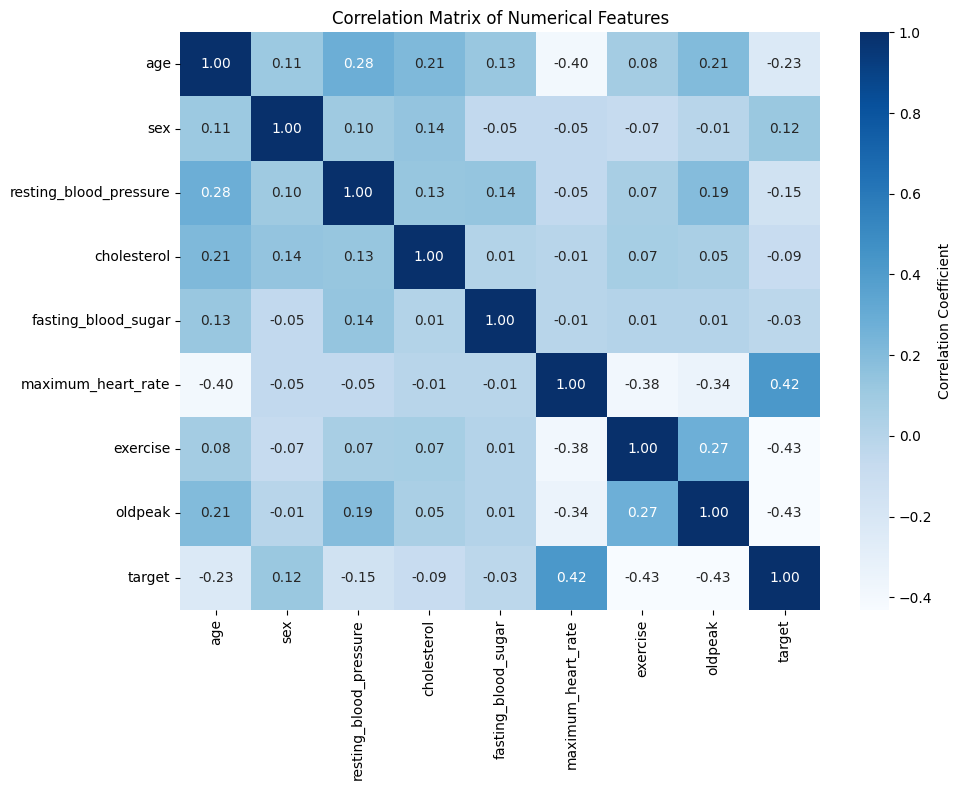

In [30]:
# Compute the correlation matrix for numeric features, excluding non-numeric columns
numeric_data = df.drop(columns=['chest_pain_type', 'resting_electrocadiographic', 'slope', 'ca', 'thal'])
correlation_matrix = numeric_data.corr()

# Set up the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8)) # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features') # title for the heatmap
plt.tight_layout() #adjust layout to prevent clipping
plt.show() # display the heatmap

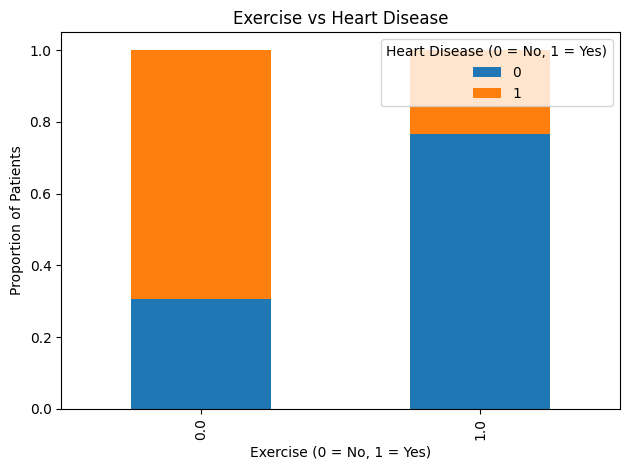

In [31]:
# Create a stacked bar plot for exercise vs heart disease (target)
exercise_target = pd.crosstab(df['exercise'], df['target'], normalize='index') #create a cross-tabulation

# Plot the stacked bar chart
exercise_target.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e']) #stacked bar plot
plt.title('Exercise vs Heart Disease') #title for the plot
plt.xlabel('Exercise (0 = No, 1 = Yes)') #x-axis label
plt.ylabel('Proportion of Patients') #y-axis label
plt.legend(title='Heart Disease (0 = No, 1 = Yes)', loc='upper right') #legend title and location
plt.tight_layout() #adjust layout
plt.show() #display the plot

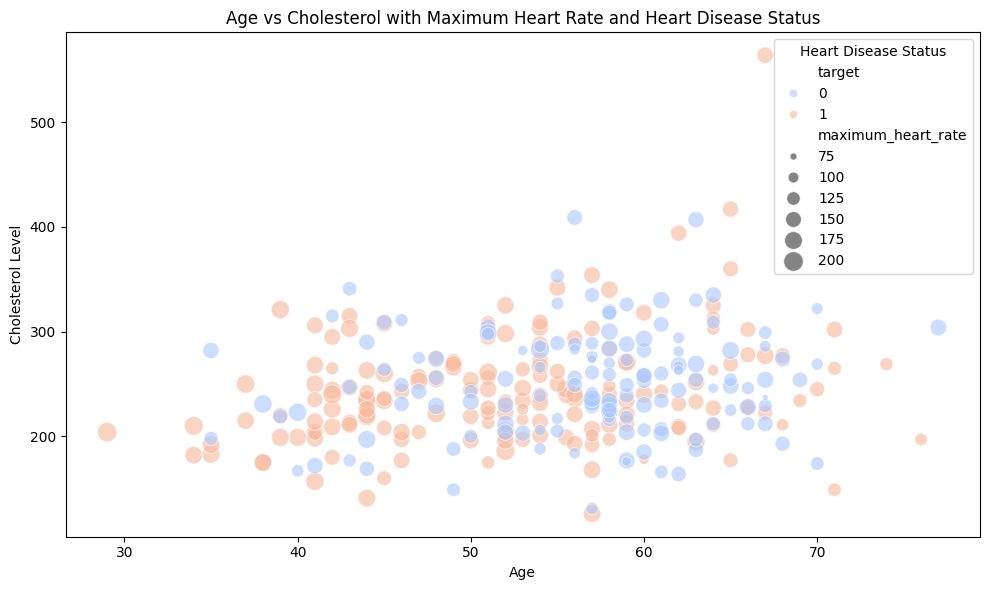

In [32]:
# Create a scatter plot of age vs cholesterol, sized by maximum heart rate, colored by heart disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cholesterol', size='maximum_heart_rate', hue='target', data=df, palette='coolwarm', sizes=(20, 200), alpha=0.6)
plt.title('Age vs Cholesterol with Maximum Heart Rate and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease Status', loc='upper right')
plt.tight_layout()
plt.show()

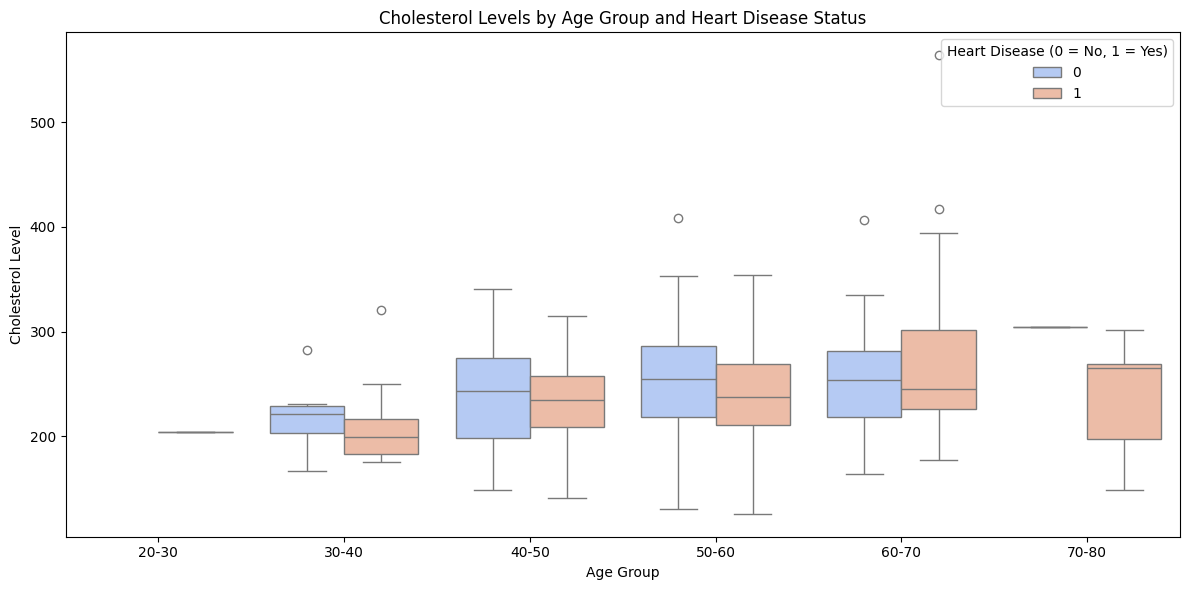

In [33]:
# Create age bins for better grouping
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='cholesterol', hue='target', data=df, palette='coolwarm')
plt.title('Cholesterol Levels by Age Group and Heart Disease Status')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

In [34]:
# Create a violin plot to show cholesterol levels by heart disease status across age groups
fig_predictive = px.violin(df,
                          x='target',
                          y='cholesterol',
                          facet_col='age_group',  # Facet by age group for better granularity
                          title='Violin Plot: Cholesterol Levels by Heart Disease Status Across Age Groups',
                          labels={'target': 'Heart Disease', 'chol': 'Cholesterol Level'},
                          color='target',
                          box=True, #add boxplot inside the violin
                          points='all', #show all data points
                          color_discrete_sequence=['#636EFA', '#EF553B']) #define colors

fig_predictive.show() #display the interactive plot

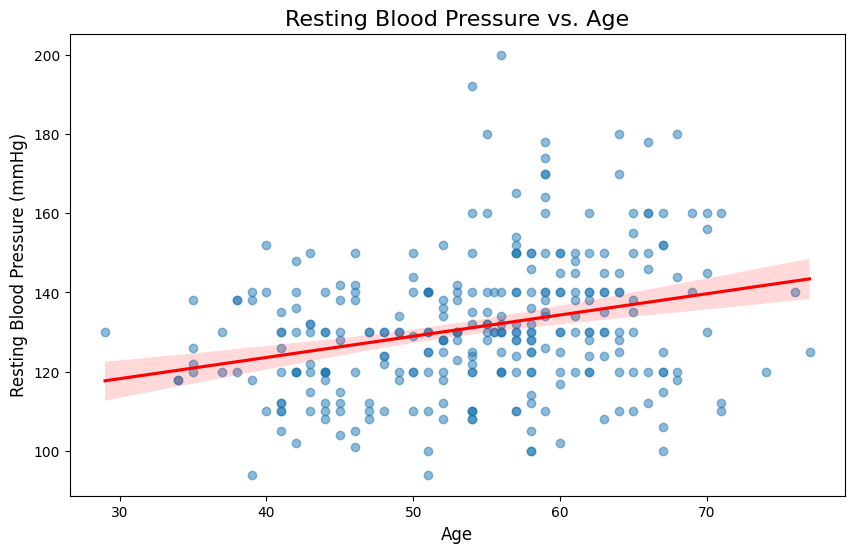

In [35]:
# Create a regression plot for resting blood pressure vs. age
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='resting_blood_pressure', data=df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Resting Blood Pressure vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Resting Blood Pressure (mmHg)', fontsize=12)
plt.show()

In [36]:
# Create an interactive scatter plot for age vs cholesterol, colored by heart disease status
fig_storytelling = px.scatter(df,
                              x='age',
                              y='cholesterol',
                              color='target', #color by heart disease status
                              title='Age vs Cholesterol with Heart Disease Status',
                              labels={'target': 'Heart Disease', 'chol': 'Cholesterol Level'},
                              hover_data=['chest_pain_type', 'thal'], #additional info on hover
                              color_continuous_scale=px.colors.sequential.Viridis) #color scale

fig_storytelling.show()